In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CITY_DATA = { 'chicago': 'chicago.csv',
              'new york city': 'new_york_city.csv',
              'washington': 'washington.csv' }


def get_filters():
    """
    Asks user to specify a city, month, and day to analyze.

    Returns:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    """
    print('Hello! Let\'s explore some US bikeshare data!')
    
    # TO DO: get user input for city (chicago, new york city, washington). HINT: Use a while loop to handle invalid inputs
    
    cities = ['chicago', 'new york city', 'washington']
    city = input('Enter city name (Chicago, New York City or Washington): ').lower().strip()
    while city not in cities:
        print('***Wrong input, try again.***')
        city = input('Enter city name (Chicago, New York City or Washington): ').lower().strip()

    # TO DO: get user input for month (all, january, february, ... , june)
    months = ['january', 'february', 'march', 'april', 'may', 'june', 'all']
    month = input('Enter month (January, February, March, April, May, June or all): ').lower().strip()
    while True:
        if month in months:
            break
        else:
            print('***Wrong input, try again***.')
            month = input('Enter month (January, February, March, April, May or June or all): ').lower().strip()
        
    # TO DO: get user input for day of week (all, monday, tuesday, ... sunday)
    days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'all'] 
    day = input('Enter day name (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday or all): ').lower().strip()
    while True:
        if day in days:
            break
        else:
            print('***Wrong input, try again.***')
            day = input('Enter day name (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday or all): ').lower().strip()
        
        
    print('-'*40)
    return city, month, day

In [3]:

def load_data(city, month, day):
    """
    Loads data for the specified city and filters by month and day if applicable.

    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - Pandas DataFrame containing city data filtered by month and day
    """
    df = pd.read_csv(CITY_DATA[city])
    
    df['Start Time'] = pd.to_datetime(df['Start Time'])
    df['month'] = df['Start Time'].dt.month
    df['day'] = df['Start Time'].dt.strftime("%A")
    
    months = ['january', 'february', 'march', 'april', 'may', 'june', 'all']
    if month != 'all':
        month = months.index(month) + 1
        df = df[df['month'] == month]
    
    if day != 'all':
        df = df[df['day'] == day.title()]
  
    return df

In [4]:
def time_stats(df):
    """Displays statistics on the most frequent times of travel."""

    print('\nCalculating The Most Frequent Times of Travel...\n')
    start_time = time.time()
    
    df.head()
    
    # TO DO: display the most common month
    months = ['january', 'february', 'march', 'april', 'may', 'june']
    month = df['month'].mode()[0]
    print(f"\nThe most common month is {months[month-1]}")
    
    # TO DO: display the most common day of week
    common_day = df['Start Time'].dt.day_name().mode()[0]
    print(f"\nThe most common day is {common_day}")
    
    # TO DO: display the most common start hour
    common_hour = df['Start Time'].dt.hour.mode()[0]
    print(f"\nThe most common hour is {common_hour}")
    
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)



In [5]:
def station_stats(df):
    """Displays statistics on the most popular stations and trip."""

    print('\nCalculating The Most Popular Stations and Trip...\n')
    start_time = time.time()

    # TO DO: display most commonly used start station
    common_start_station = df['Start Station'].mode()[0]
    print(f'The most common start station is: {common_start_station}')
  
    # TO DO: display most commonly used end station
    common_end_station = df['End Station'].mode()[0]
    print(f'The most common end station is: {common_end_station}')

    # TO DO: display most frequent combination of start station and end station trip
    df['start_end_combination'] = df['Start Station']+ ' to ' +df['End Station']
    strat_end =  df['start_end_combination'].mode()[0]
    print(f'The most common start-end stations are: {strat_end}')
   
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


In [6]:
def trip_duration_stats(df):
    """Displays statistics on the total and average trip duration."""

    print('\nCalculating Trip Duration...\n')
    start_time = time.time()

    # TO DO: display total travel time
    total_travel_time = (pd.to_datetime(df['End Time']) - pd.to_datetime(df['Start Time'])).sum().round('1s')
    print(f"The total travel time is: {total_travel_time}")
    
    # TO DO: display mean travel time
    mean_travel_time = (pd.to_datetime(df['End Time']) - pd.to_datetime(df['Start Time'])).mean().round('1s')
    print(f"The mean travel time is: {mean_travel_time}")

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)



In [7]:
def user_stats(df):
    """Displays statistics on bikeshare users."""

    print('\nCalculating User Stats...\n')
    start_time = time.time()

    # TO DO: Display counts of user types
    user_types = df['User Type'].value_counts()
    print(f"The number of user types: \n{user_types}")
    plt.pie(x=df['User Type'].value_counts(), labels = df['User Type'].value_counts(),colors=sns.color_palette('Set2'),data = df, autopct='%.0f%%')
    plt.show()
    
    # TO DO: Display counts of gender
    if 'Gender' in df.columns:
        gender = df['Gender'].value_counts()
        print(f"\nThe gender of users: \n{gender}")
        plt.pie(x=df['Gender'].value_counts(),labels = df['Gender'].value_counts() ,colors=sns.color_palette('Set2'),data = df, autopct='%.0f%%')
        plt.show()
    else:
        print('\nGender data is not found\n')

    # TO DO: Display earliest, most recent, and most common year of birth
    if 'Birth Year' in df.columns:
        earliest_birth_year = round(df['Birth Year'].min())
        recent_birth_year = round(df['Birth Year'].max())
        common_birth_year = round(df['Birth Year'].mode()[0])
        print(f"\nThe earliest birth year is {earliest_birth_year}. \nThe recent birth year is {recent_birth_year}. \nThe common birth year is {common_birth_year}.")
    else:
        print('\nBirth year data is not found')

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)



In [8]:
def display_data(df):
    """Displays random 5 rows of the data"""
    print('\nCalculating User Stats...\n')
    start_time = time.time()
    
    display = input("Display 5 rows from  the data? (yes or no): ").lower().strip()
    if display == 'yes':
        while True:
            print(df.sample(n=5))
            display_next = input('\nDisplay next 5 raws? (yes or no): ').lower().strip()
            if display_next != 'yes':
                break
            
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)
    

Hello! Let's explore some US bikeshare data!
Enter city name (Chicago, New York City or Washington): new York city    
Enter month (January, February, March, April, May, June or all): February
Enter day name (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday or all): monday
----------------------------------------

Calculating The Most Frequent Times of Travel...


The most common month is february

The most common day is Monday

The most common hour is 17

This took 0.003997325897216797 seconds.
----------------------------------------

Calculating The Most Popular Stations and Trip...

The most common start station is: Pershing Square North
The most common end station is: Pershing Square North
The most common start-end stations are: 1 Ave & E 62 St to 1 Ave & E 68 St

This took 0.003997802734375 seconds.
----------------------------------------

Calculating Trip Duration...

The total travel time is: 45 days 22:01:05
The mean travel time is: 0 days 00:11:59

This took 0.

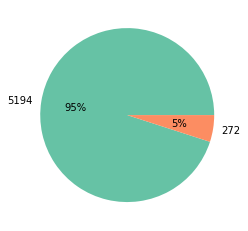


The gender of users: 
Male      3987
Female    1205
Name: Gender, dtype: int64


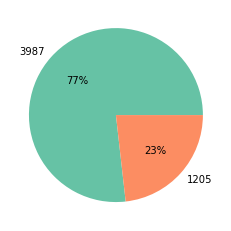


The earliest birth year is 1885. 
The recent birth year is 2000. 
The common birth year is 1985.

This took 0.4567446708679199 seconds.
----------------------------------------

Calculating User Stats...

Display 5 rows from  the data? (yes or no): yes
        Unnamed: 0          Start Time             End Time  Trip Duration  \
4961        888062 2017-02-06 17:38:19  2017-02-06 17:55:19           1020   
77224      1202822 2017-02-20 13:33:37  2017-02-20 13:49:29            952   
297999      984090 2017-02-13 08:52:59  2017-02-13 08:58:08            309   
298464      996819 2017-02-13 18:16:45  2017-02-13 18:33:26           1000   
82210       879793 2017-02-06 13:43:43  2017-02-06 13:46:52            189   

                  Start Station              End Station   User Type  Gender  \
4961    Madison St & Clinton St          1 Ave & E 18 St  Subscriber  Female   
77224       Bond St & Fulton St    Fulton St & Grand Ave  Subscriber  Female   
297999       Broadway & E 22 St  Lexi

In [9]:
def main():
    while True:
        city, month, day = get_filters()
        df = load_data(city, month, day)

        time_stats(df)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df)
        display_data(df)
        
        restart = input('\nWould you like to restart? (yes or no): \n')
        if restart.lower() != 'yes':
            break
    print('\nThank you!')

if __name__ == "__main__":
	main()